In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv('/content/drive/MyDrive/DataScience/trabalho/titanic-tratado.csv',
                  encoding='utf-8')

In [6]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,2,1,1,female,38.0,1,0,71.2833,C
1,4,1,1,female,35.0,1,0,53.1000,S
2,7,0,1,male,54.0,0,0,51.8625,S
3,11,1,3,female,4.0,1,1,16.7000,S
4,12,1,1,female,58.0,0,0,26.5500,S


In [7]:
df.shape

(183, 9)

##Legenda

PassengerId: id do passageiro

Survived: número de sobreviventes

Pclass: classe do ingresso

Age: idade

SibSp: cônjuges e irmãos a bordo

Fare: tarifa de passageiros

Embarked: embarcados

Sex: sexo

Parch: número de pais e filhos a bordo

##Transformando as variáveis categóricas

In [8]:
df2 = pd.DataFrame.copy(df)

In [9]:
df2['Sex'].replace({'female':0, 'male': 1}, inplace=True)
df2['Embarked'].replace({'C': 0, 'Q': 1, 'S': 2}, inplace=True)


In [10]:
df2.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked         int64
dtype: object

In [11]:
df2.shape

(183, 9)

## Previsores e Alvo



In [12]:
df2.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,2,1,1,0,38.0,1,0,71.2833,0
1,4,1,1,0,35.0,1,0,53.1000,2
2,7,0,1,1,54.0,0,0,51.8625,2
3,11,1,3,0,4.0,1,1,16.7000,2
4,12,1,1,0,58.0,0,0,26.5500,2


In [13]:
previsores = df2.iloc[:, 0:8].values

In [14]:
previsores

array([[  2.    ,   1.    ,   1.    , ...,   1.    ,   0.    ,  71.2833],
       [  4.    ,   1.    ,   1.    , ...,   1.    ,   0.    ,  53.1   ],
       [  7.    ,   0.    ,   1.    , ...,   0.    ,   0.    ,  51.8625],
       ...,
       [880.    ,   1.    ,   1.    , ...,   0.    ,   1.    ,  83.1583],
       [888.    ,   1.    ,   1.    , ...,   0.    ,   0.    ,  30.    ],
       [890.    ,   1.    ,   1.    , ...,   0.    ,   0.    ,  30.    ]])

In [15]:
previsores.shape

(183, 8)

In [16]:
alvo = df2.iloc[:, 8].values

In [17]:
alvo

array([0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2,
       2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0,
       2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 0, 2, 0])

In [18]:
alvo.shape

(183,)

##Escalonamento

Padronização (utiliza a média e o desvio padrão como referência).

In [19]:
df2.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,455.366120,0.672131,1.191257,0.519126,35.674426,0.464481,0.475410,78.682469,1.278689
std,247.052476,0.470725,0.515187,0.501005,15.643866,0.644159,0.754617,76.347843,0.957294
min,2.000000,0.000000,1.000000,0.000000,0.920000,0.000000,0.000000,0.000000,0.000000
25%,263.500000,0.000000,1.000000,0.000000,24.000000,0.000000,0.000000,29.700000,0.000000
50%,457.000000,1.000000,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000,2.000000
75%,676.000000,1.000000,1.000000,1.000000,47.500000,1.000000,1.000000,90.000000,2.000000
max,890.000000,1.000000,3.000000,1.000000,80.000000,3.000000,4.000000,512.329200,2.000000


In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
previsores_esc = StandardScaler().fit_transform(previsores)

In [22]:
previsores_esc

array([[-1.84013507,  0.6984303 , -0.37225618, ...,  0.83362754,
        -0.63172982, -0.0971798 ],
       [-1.83201742,  0.6984303 , -0.37225618, ...,  0.83362754,
        -0.63172982, -0.3359971 ],
       [-1.81984093, -1.43178211, -0.37225618, ..., -0.7230443 ,
        -0.63172982, -0.35225028],
       ...,
       [ 1.72351585,  0.6984303 , -0.37225618, ..., -0.7230443 ,
         0.69708118,  0.05878503],
       [ 1.75598648,  0.6984303 , -0.37225618, ..., -0.7230443 ,
        -0.63172982, -0.63938976],
       [ 1.76410413,  0.6984303 , -0.37225618, ..., -0.7230443 ,
        -0.63172982, -0.63938976]])

In [23]:
previsoresdf = pd.DataFrame(previsores_esc)
previsoresdf

,0,1,2,3,4,5,6,7
0,-1.840135,0.698430,-0.372256,-1.039012,0.149065,0.833628,-0.631730,-0.097180
1,-1.832017,0.698430,-0.372256,-1.039012,-0.043230,0.833628,-0.631730,-0.335997
2,-1.819841,-1.431782,-0.372256,0.962453,1.174636,-0.723044,-0.631730,-0.352250
3,-1.803606,0.698430,3.520480,-1.039012,-2.030273,0.833628,0.697081,-0.814070
4,-1.799547,0.698430,-0.372256,-1.039012,1.431029,-0.723044,-0.631730,-0.684702
...,...,...,...,...,...,...,...,...
178,1.691045,0.698430,-0.372256,-1.039012,0.725949,0.833628,0.697081,-0.343166
179,1.695104,-1.431782,-0.372256,0.962453,-0.171426,-0.723044,-0.631730,-0.967737
180,1.723516,0.698430,-0.372256,-1.039012,1.302832,-0.723044,0.697081,0.058785
181,1.755986,0.698430,-0.372256,-1.039012,-1.068801,-0.723044,-0.631730,-0.639390


##Treino e Teste

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_treino, x_teste, y_treino, y_teste = train_test_split(previsores_esc, alvo, test_size = 0.3, random_state = 0)

In [26]:
x_treino.shape

(128, 8)

In [27]:
x_teste.shape

(55, 8)

In [28]:
y_treino.shape

(128,)

In [29]:
y_teste.shape

(55,)

# Árvore de Decisão

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [31]:
arvore = DecisionTreeClassifier(criterion='entropy', random_state = 0, max_depth=3)
_arvore = arvore.fit(x_treino, y_treino)

[Text(0.4583333333333333, 0.875, 'X[7] <= -0.677\nentropy = 1.012\nsamples = 128\nvalue = [41, 2, 85]'),
 Text(0.25, 0.625, 'X[1] <= -0.367\nentropy = 0.211\nsamples = 30\nvalue = [1, 0, 29]'),
 Text(0.16666666666666666, 0.375, 'X[7] <= -0.88\nentropy = 0.414\nsamples = 12\nvalue = [1, 0, 11]'),
 Text(0.08333333333333333, 0.125, 'entropy = 0.0\nsamples = 7\nvalue = [0, 0, 7]'),
 Text(0.25, 0.125, 'entropy = 0.722\nsamples = 5\nvalue = [1, 0, 4]'),
 Text(0.3333333333333333, 0.375, 'entropy = 0.0\nsamples = 18\nvalue = [0, 0, 18]'),
 Text(0.6666666666666666, 0.625, 'X[5] <= 0.055\nentropy = 1.104\nsamples = 98\nvalue = [40, 2, 56]'),
 Text(0.5, 0.375, 'X[4] <= -0.909\nentropy = 1.0\nsamples = 51\nvalue = [26, 0, 25]'),
 Text(0.4166666666666667, 0.125, 'entropy = 0.544\nsamples = 8\nvalue = [1, 0, 7]'),
 Text(0.5833333333333334, 0.125, 'entropy = 0.981\nsamples = 43\nvalue = [25, 0, 18]'),
 Text(0.8333333333333334, 0.375, 'X[7] <= -0.099\nentropy = 1.11\nsamples = 47\nvalue = [14, 2, 31]'

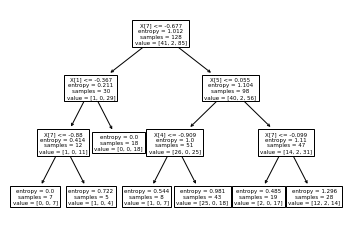

In [32]:
tree.plot_tree(_arvore)

In [33]:
previsoes_arvore = arvore.predict(x_teste)
previsoes_arvore

array([2, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2,
       0, 2, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 2,
       0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2])

In [34]:
y_teste

array([0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2,
       0, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2])

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [36]:
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes_arvore) * 100.0))

Acurácia: 60.00%


In [37]:
confusion_matrix(y_teste, previsoes_arvore)

array([[11, 13],
       [ 9, 22]])

In [38]:
print(classification_report(y_teste, previsoes_arvore))

              precision    recall  f1-score   support

           0       0.55      0.46      0.50        24
           2       0.63      0.71      0.67        31

    accuracy                           0.60        55
   macro avg       0.59      0.58      0.58        55
weighted avg       0.59      0.60      0.59        55



In [39]:
previsoes_treino = arvore.predict(x_treino)
previsoes_treino

array([2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2,
       2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2])

In [40]:
accuracy_score(y_treino, previsoes_treino)

0.71875

In [41]:
confusion_matrix(y_treino, previsoes_treino)

array([[25,  0, 16],
       [ 0,  0,  2],
       [18,  0, 67]])